In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#Defining a single sequential model
model = keras.Sequential([layers.Dense(units = 1, input_shape = [3])])

In [4]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.12904382],
        [-1.0446402 ],
        [ 0.18888319]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [5]:
import pandas as pd
import matplotlib

In [13]:
red_wine = pd.read_csv("red-wine.csv")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
dense_model = keras.Sequential([
    layers.Dense(units=9, activation="relu", input_shape = [11]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=1)
])

In [15]:
dense_model.compile(
    optimizer="adam",
    loss="mae",
)

In [16]:
Y =  red_wine.quality
X = red_wine.drop('quality',axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7)


In [18]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
Y_train = df_train['quality']
Y_test = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [11]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846,0.4
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846,0.4
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231,0.4
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692,0.6


In [19]:
history = dense_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size= 256)

Epoch 1/10
5/5 [==============================] - 1s 56ms/step - loss: 0.3829 - val_loss: 32.0315
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1692 - val_loss: 39.4333
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1416 - val_loss: 27.7539
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1509 - val_loss: 25.6301
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1329 - val_loss: 27.8736
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1324 - val_loss: 24.3171
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1254 - val_loss: 20.2145
Epoch 8/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1232 - val_loss: 19.3813
Epoch 9/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1219 - val_loss: 18.4206
Epoch 10/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1190 - val_loss: 15.6651


<AxesSubplot: >

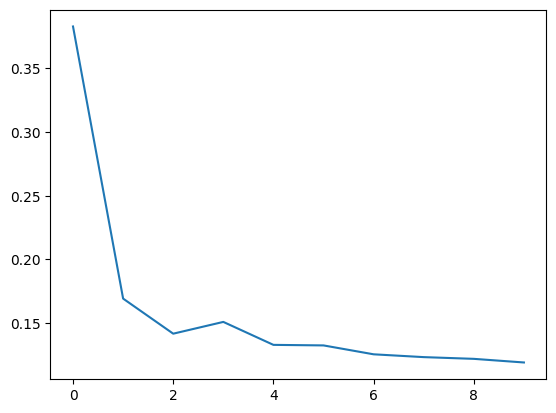

In [20]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

In [21]:
pred = dense_model.predict(X_test)
pred

15/15 [==============================] - 0s 2ms/step


array([[48.285248 ],
       [10.102853 ],
       [10.359728 ],
       [10.024036 ],
       [27.813726 ],
       [19.437077 ],
       [32.566044 ],
       [17.171547 ],
       [26.691933 ],
       [ 7.272041 ],
       [11.096761 ],
       [17.036331 ],
       [31.557432 ],
       [10.612446 ],
       [ 8.949461 ],
       [11.407499 ],
       [ 9.469652 ],
       [34.641182 ],
       [15.508164 ],
       [22.815086 ],
       [30.666988 ],
       [ 8.195196 ],
       [18.301489 ],
       [12.777424 ],
       [11.448679 ],
       [ 8.59889  ],
       [10.747499 ],
       [33.23907  ],
       [14.397585 ],
       [12.842478 ],
       [10.120691 ],
       [10.0644865],
       [13.123522 ],
       [13.341498 ],
       [10.451587 ],
       [19.7204   ],
       [12.119217 ],
       [ 9.512213 ],
       [ 9.640846 ],
       [ 9.064673 ],
       [18.92386  ],
       [14.660488 ],
       [ 9.150373 ],
       [42.508205 ],
       [31.720125 ],
       [ 9.501574 ],
       [20.25516  ],
       [11.58

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
#acc = accuracy_score(y_pred=pred,y_true = Y_test)
mse = mean_squared_error(y_pred=pred,y_true = Y_test)
sqrt(mse)

18.307224567621656

In [63]:
tf.keras.utils.set_random_seed(0)


dense_model = keras.Sequential([
    layers.Input(shape=[11]),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=1)
])

dense_model.compile(
    optimizer="adam",
    loss="mae",
)
history = dense_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size= 1)
pred = dense_model.predict(X_test)
mse = mean_squared_error(y_pred=pred,y_true = Y_test)
sqrt(mse)


Epoch 1/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1256 - val_loss: 2.8810
Epoch 2/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1104 - val_loss: 3.3986
Epoch 3/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1097 - val_loss: 13.5678
Epoch 4/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1069 - val_loss: 4.9526
Epoch 5/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1041 - val_loss: 1.2669
Epoch 6/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.1025 - val_loss: 4.0941
Epoch 7/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.0984 - val_loss: 0.3543
Epoch 8/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.0974 - val_loss: 4.0929
Epoch 9/10
1119/1119 [==============================] - 6s 5ms/step - loss: 0.0971 - val_loss: 3.8878
Epoch 10/10
15/15 [==============================] - 0s 2ms/step


2.2285150004344074

<AxesSubplot: >

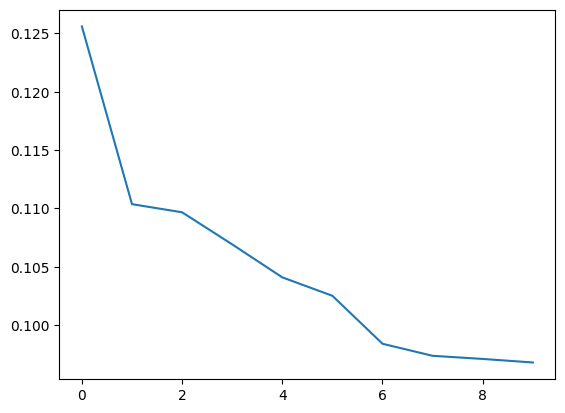

In [64]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

In [28]:
#Adding callback option with an early stop
from keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=10,min_delta=0.005,restore_best_weights=True)
dense_model = keras.Sequential([
    layers.Dense(units=9, activation="relu", input_shape = [11]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=1)
])
dense_model.compile(optimizer='adam',loss='mae')
history = dense_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size= 1,callbacks=[early_stopping])
pred = dense_model.predict(X_test)
mse = mean_squared_error(y_pred=pred,y_true = Y_test)
sqrt(mse)

Epoch 1/10
1119/1119 [==============================] - 5s 3ms/step - loss: 0.1246 - val_loss: 9.4411
Epoch 2/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1152 - val_loss: 10.1680
Epoch 3/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1105 - val_loss: 3.4635
Epoch 4/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1070 - val_loss: 1.8186
Epoch 5/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1042 - val_loss: 3.0924
Epoch 6/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1023 - val_loss: 6.0962
Epoch 7/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1005 - val_loss: 4.2368
Epoch 8/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.0999 - val_loss: 5.0595
Epoch 9/10
1119/1119 [==============================] - 5s 4ms/step - loss: 0.0986 - val_loss: 4.6283
Epoch 10/10
15/15 [==============================] - 0s 2ms/step


13.399522948437346

In [30]:
#Adding dropout
from keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=10,min_delta=0.005,restore_best_weights=True)
dense_model = keras.Sequential([
    layers.Dense(units=9, activation="relu", input_shape = [11]),
    layers.Dense(units=512,activation='relu'),
    layers.Dropout(rate=0.25),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=1)
])
dense_model.compile(optimizer='adam',loss='mae')
history = dense_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size= 1)
pred = dense_model.predict(X_test)
mse = mean_squared_error(y_pred=pred,y_true = Y_test)
sqrt(mse)

Epoch 1/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1274 - val_loss: 5.3028
Epoch 2/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1123 - val_loss: 1.3812
Epoch 3/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1085 - val_loss: 1.0077
Epoch 4/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1073 - val_loss: 0.5527
Epoch 5/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1033 - val_loss: 0.6841
Epoch 6/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1045 - val_loss: 0.7664
Epoch 7/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1047 - val_loss: 0.4999
Epoch 8/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1022 - val_loss: 0.7294
Epoch 9/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1004 - val_loss: 1.0408
Epoch 10/10
15/15 [==============================] - 0s 2ms/step


1.9126997534380856

In [34]:
#Adding batch normalization
from keras import callbacks
early_stopping = callbacks.EarlyStopping(patience=10,min_delta=0.005,restore_best_weights=True)
dense_model = keras.Sequential([
    layers.Dense(units=9, activation="relu", input_shape = [11]),
    layers.Dense(units=512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=1)
])
dense_model.compile(optimizer='adam',loss='mae')
history = dense_model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size= 1)
pred = dense_model.predict(X_test)
mse = mean_squared_error(y_pred=pred,y_true = Y_test)
sqrt(mse)

Epoch 1/10
1119/1119 [==============================] - 5s 3ms/step - loss: 0.2094 - val_loss: 22.7702
Epoch 2/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1376 - val_loss: 22.8311
Epoch 3/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1339 - val_loss: 22.8058
Epoch 4/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1317 - val_loss: 22.7747
Epoch 5/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1315 - val_loss: 22.7700
Epoch 6/10
1119/1119 [==============================] - 4s 3ms/step - loss: 0.1315 - val_loss: 22.7984
Epoch 7/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1314 - val_loss: 22.8030
Epoch 8/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1314 - val_loss: 22.7750
Epoch 9/10
1119/1119 [==============================] - 4s 4ms/step - loss: 0.1315 - val_loss: 22.7722
Epoch 10/10
15/15 [==============================] - 0s 2ms/step


35.49232370917844

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
df = pd.read_csv('hotel.csv')
X = df.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [53]:
shape = X_train.shape[1]

Epoch 1/80
448/448 [==============================] - 3s 5ms/step - loss: 0.4291 - accuracy: 0.7987 - val_loss: 0.4061 - val_accuracy: 0.8128
Epoch 2/80
448/448 [==============================] - 2s 5ms/step - loss: 0.4008 - accuracy: 0.8123 - val_loss: 0.3977 - val_accuracy: 0.8174
Epoch 3/80
448/448 [==============================] - 2s 5ms/step - loss: 0.3918 - accuracy: 0.8176 - val_loss: 0.3925 - val_accuracy: 0.8192
Epoch 4/80
448/448 [==============================] - 2s 5ms/step - loss: 0.3842 - accuracy: 0.8216 - val_loss: 0.3830 - val_accuracy: 0.8254
Epoch 5/80
448/448 [==============================] - 2s 5ms/step - loss: 0.3785 - accuracy: 0.8251 - val_loss: 0.3837 - val_accuracy: 0.8240
Epoch 6/80
448/448 [==============================] - 2s 5ms/step - loss: 0.3727 - accuracy: 0.8279 - val_loss: 0.3715 - val_accuracy: 0.8294
Epoch 7/80
448/448 [==============================] - 2s 5ms/step - loss: 0.3681 - accuracy: 0.8297 - val_loss: 0.3666 - val_accuracy: 0.8333
Epoch 

<AxesSubplot: title={'center': 'Accuracy'}>

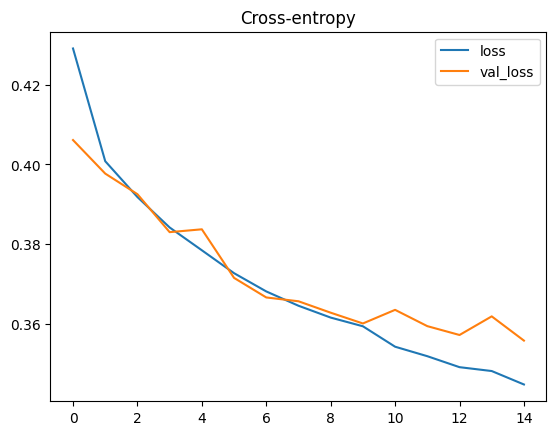

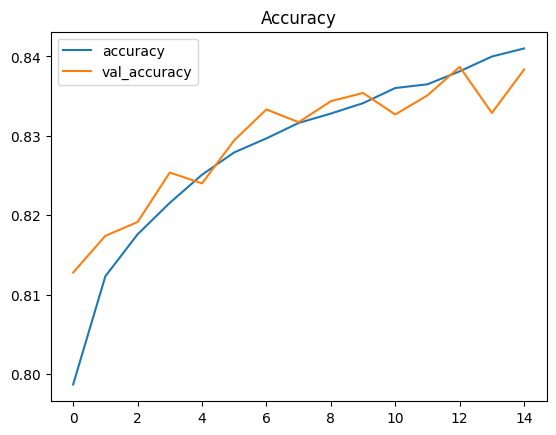

In [84]:
#Binary Classifier in Deep learning

bin_model = keras.Sequential([
    layers.Input(shape=shape),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(rate=0.25),
    layers.Dense(units=500,activation='relu'),
    layers.Dense(units=1,activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(min_delta=0.01,patience=5)

bin_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = bin_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=200,
    epochs=80,
    callbacks=[early_stopping]
    #verbose= 0
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
